<a href="https://www.kaggle.com/code/anshudhiman/linear-regression-using-headbrain-data?scriptVersionId=126747016" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Logistic Regression -Head Brain Predictions 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session






/kaggle/input/headbrain/headbrain.csv


In [2]:
df = pd.read_csv('/kaggle/input/headbrain/headbrain.csv')

In [3]:
df.shape

(237, 4)

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
# collecting x and y 
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [6]:
mean_x = np.mean(X)
mean_y =  np.mean(Y)
print(mean_x)
print(mean_y)

3633.9915611814345
1282.873417721519


In [7]:
#Total no. of values
n = len(X)

#using the formula to calclate b1 and bo
numer = 0
denom = 0
for i in range(n):
  numer += (X[i] - mean_x) * (Y[i]- mean_y)
  denom += (X[i] - mean_x) ** 2
b1 = numer/ denom
b0 = mean_y - (b1 * mean_x)


# print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


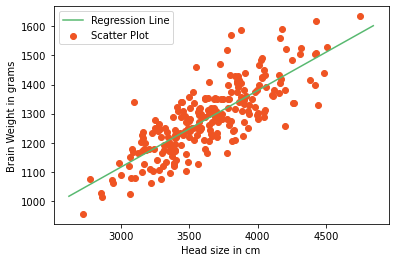

In [8]:
# plotting values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line value x and y 
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

#ploting line 
plt.plot(x,y,color = '#58b970', label = 'Regression Line')
#ploting Scatter points 
plt.scatter(X,Y,c= '#ef5423', label = 'Scatter Plot')


plt.xlabel('Head size in cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [9]:
# to find how good our model is

ss_t = 0
ss_r = 0
for i in range(n):
  yp = b0 + b1* X[i]
  ss_r += (Y[i]- yp) ** 2
  ss_t +=  (Y[i] - mean_y) **2
r2 = 1- (ss_r/ ss_t)
print(r2)

0.6393117199570003


In [10]:
# R2 value is ok now let us implement the model using scikit learn


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((n,1))
# Creating Model
reg = LinearRegression()
# fitting training data 
reg = reg.fit(X,Y)
# Y prediction
Y_pred = reg.predict(X)

# Calculating R2 Score 
r2_score = reg.score(X, Y)

print(r2_score)


0.639311719957
